## Introduction:
In the following notebook we are going to apply PCA on Titanic Data. First of all, we will do some basic data preparation.
I have explored the different features in another notebook(we viewed on the distribution difference). However, in this notebook we will use PCA for vizualizationa and better data.

In [180]:
### utilss
def percent_calculate(portion:float, whole:float):
        return round(100*(portion/whole))

def calculate_na_values_percent_per_column(dataframe_col):
    total_num_rows = dataframe_col.shape[0]
    total_num_nona_rows = dataframe_col.dropna().shape[0]
    return (percent_calculate(total_num_nona_rows,total_num_rows))

## Basic Data preparation:

In [181]:
import pandas as pd

In [182]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv('test.csv')

train_data.head(10) #view at the train data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Inspect which columns have null values:

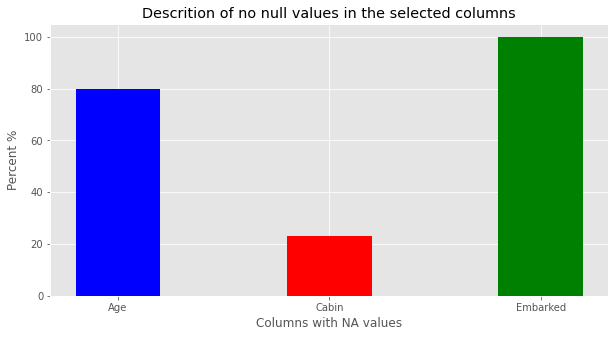

In [183]:
#Inspect the columns with missing values
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10, 5))
 
columns_with_na_values = train_data.columns[train_data.isna().any()].tolist()
percents = [calculate_na_values_percent_per_column(train_data['Age']),calculate_na_values_percent_per_column(train_data['Cabin']),
            calculate_na_values_percent_per_column(train_data['Embarked'])]

# creating the bar plot
plt.bar(columns_with_na_values, percents, color = ['blue','red','green'],
        width = 0.4)
 
plt.xlabel("Columns with NA values")
plt.ylabel("Percent %")
plt.title("Descrition of no null values in the selected columns")
plt.show()


The conclusion is that we should not use Cabin column because it has only 20% not null values.
We will complete the age values with Linear regression.

### Fill missing values:

We fill the Age column with linear regression by using two columns Sibsp(which is number of brothers and Pclass)
In other notebook we saw that different Pclasses have difference in age distribution.

In [184]:
from sklearn.linear_model import LinearRegression

data_for_reg = train_data[['Pclass','SibSp','Age']].dropna()
X,y =  data_for_reg[['Pclass','SibSp']], data_for_reg['Age']

reg = LinearRegression().fit(X,y)

missing_values_indexes = train_data['Age'].isnull()
train_data.loc[missing_values_indexes,'Age']= reg.predict(train_data.loc[missing_values_indexes,['Pclass','SibSp']])


#### Data cleaning

In [185]:
#dealing with categorical
train_data['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

train_data['Embarked'].replace(['Q','C','B','S'], [0,1,2,3], inplace = True)

In [186]:
#normalize the numerical features
#credit: https://www.geeksforgeeks.org/data-normalization-with-pandas/
for column in ['Fare','Age']:
   train_data[column] = (train_data[column] -
                           train_data[column].mean()) / train_data[column].std() #I have chosen the  normal standartization method

In [187]:
selected_features = ['Survived','Pclass','Sex','SibSp','Age','Parch','Fare','Embarked']
train_data = train_data[selected_features]
train_data.dropna(inplace=True)

### PCA:
We apply PCA

In [188]:
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')


from matplotlib.pyplot import figure

figure(figsize=(50, 50), dpi=80)

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

Text(0.5, 1.0, 'Explained Variance for the data')

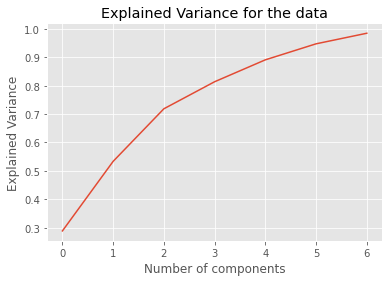

In [189]:
pca_7 = PCA(n_components =7, random_state  = 2020)
pca_7.fit(train_data)
data_7 = pca_7.transform(train_data)

plt.plot(np.cumsum(pca_7.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for the data')

According this graph it seems that it is enough to have two components

In [190]:
pca_2 = PCA(n_components =2, random_state  = 2020)
pca_2.fit(train_data)
data_2 = pca_2.transform(train_data)

Graph 1 Survived vs Not survived:

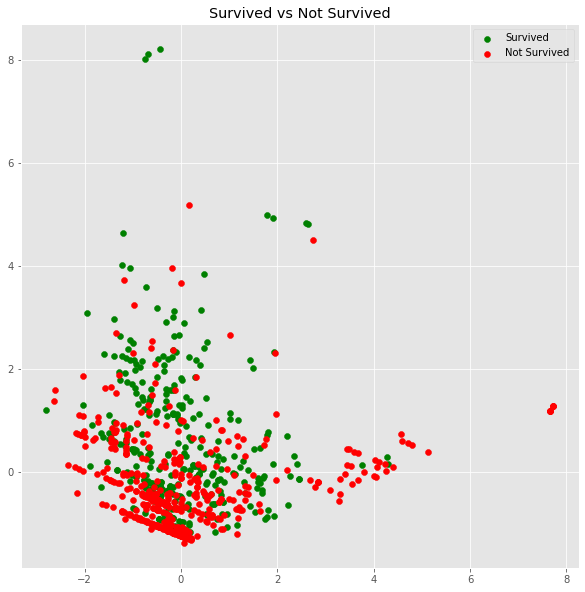

In [205]:
cluster1 = data_2[train_data['Survived']==1]
cluster2 = data_2[train_data['Survived']==0]

fig = plt.figure(figsize = (10, 10))

plt.scatter(cluster1[:,0],cluster1[:,1],color ='green',label='Survived')
plt.scatter(cluster2[:,0],cluster2[:,1],color ='red',label ='Not Survived')
plt.title('Survived vs Not Survived')
plt.legend()


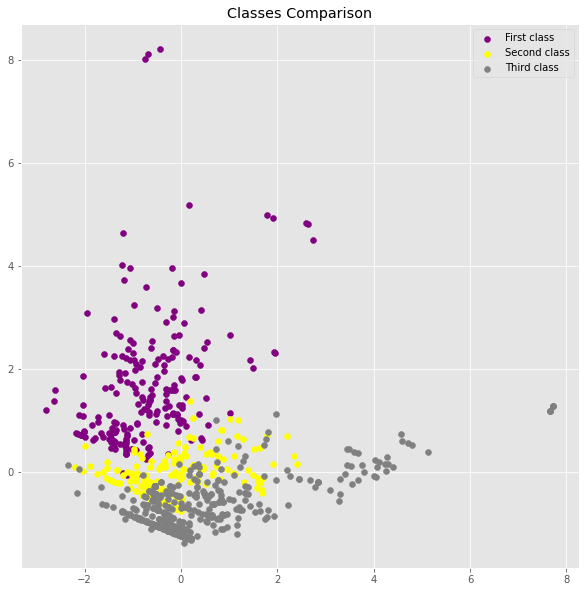

In [196]:
cluster1 = data_2[train_data['Pclass']==1]
cluster2 = data_2[train_data['Pclass']==2]
cluster3 = data_2[train_data['Pclass']==3]

fig = plt.figure(figsize = (10, 10))

plt.scatter(cluster1[:,0],cluster1[:,1],color ='purple',label='First class')
plt.scatter(cluster2[:,0],cluster2[:,1],color ='yellow',label ='Second class')
plt.scatter(cluster3[:,0],cluster3[:,1],color ='gray',label ='Third class')
plt.title('Classes Comparison')
plt.legend()


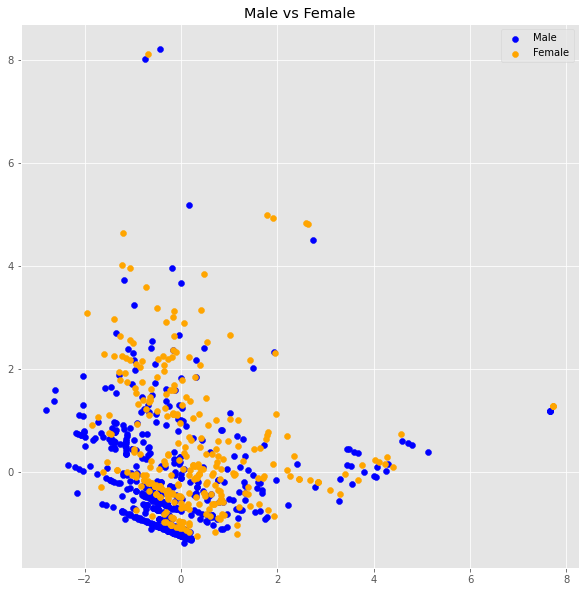

In [200]:
cluster1 = data_2[train_data['Sex']==0]
cluster2 = data_2[train_data['Sex']==1]


fig = plt.figure(figsize = (10, 10))

plt.scatter(cluster1[:,0],cluster1[:,1],color ='blue',label='Male')
plt.scatter(cluster2[:,0],cluster2[:,1],color ='orange',label ='Female')
plt.title('Male vs Female')
plt.legend()

## Classification:

In [203]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_data, test_size=0.3)
x_train, x_val= train.loc[:, train_data.columns != 'Survived'], val.loc[:, train_data.columns != 'Survived']
y_train, y_val = train['Survived'], val['Survived']